In [1]:
import staircase as sc
from imports import *
import operator
import warnings
from hotstepper.basis.Bases import Bases
from hotstepper.basis.Basis import Basis

warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r"..//data/vessel_queue.csv", parse_dates=['enter', 'leave'], dayfirst=True)
vsteps = Steps(use_datetime=True).add_direct(df.enter,df.leave)


<AxesSubplot:>

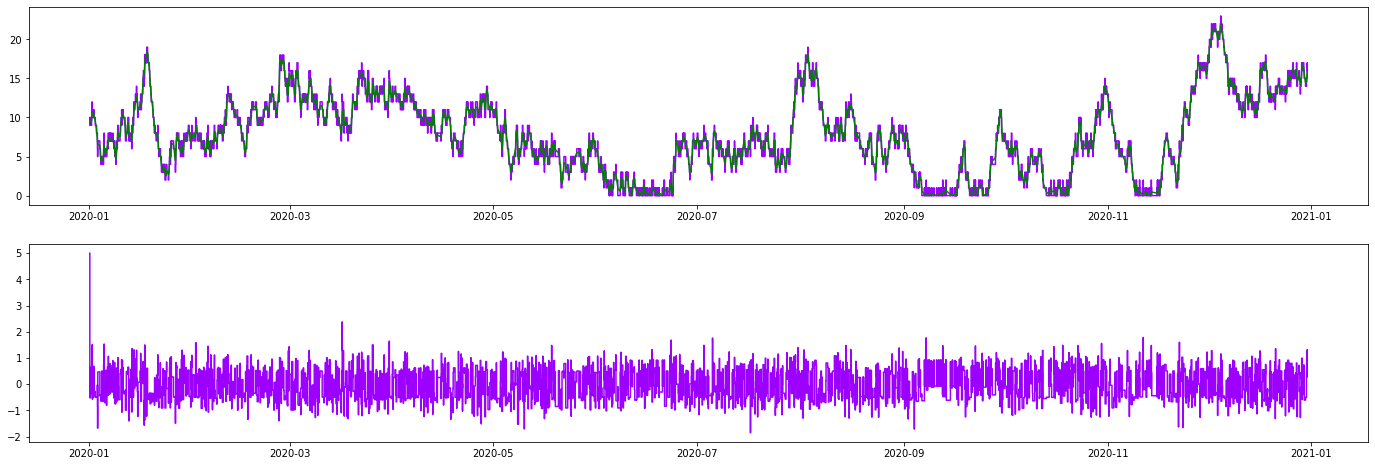

In [3]:
#p = np.arange(pd.Timestamp(2020,1,1),pd.Timestamp(2020,3,1),pd.Timedelta(hours=1)).astype(pd.Timestamp)

fig,(ax,ax2) = plt.subplots(nrows=2,figsize=(24,8))

vsteps_smooth = vsteps.copy()
vsteps_smooth.rebase(Basis(Bases.logit,10**4))
#vsteps.rebase()
vsteps.plot(ax=ax)
vsteps_smooth.smooth_plot(ax=ax,color='g')

delta_steps = vsteps - vsteps_smooth
delta_steps.plot(ax=ax2)


<AxesSubplot:title={'center':'Step Values Histogram'}, xlabel='Steps Range'>

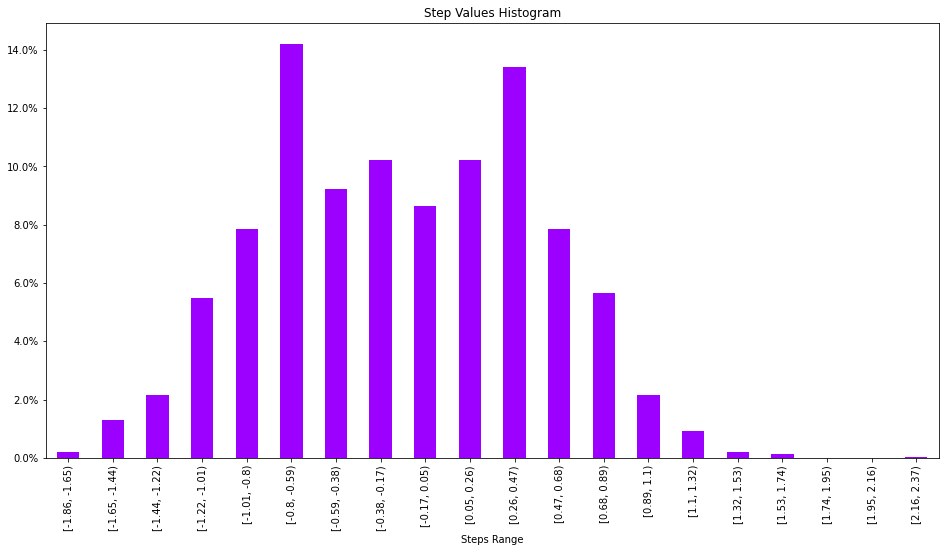

In [5]:
delta_steps.histogram_plot()

<AxesSubplot:>

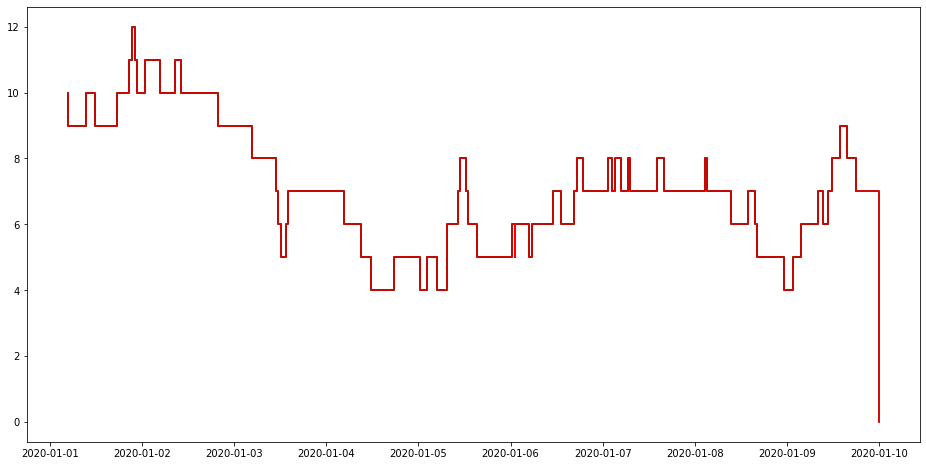

In [6]:
clip_step_end = Step(end=pd.Timestamp(2020,1,10))
steps_end = Steps(True).add_direct([None],[pd.Timestamp(2020,1,10)])
clip_step_start = Step(start=pd.Timestamp(2020,5,1))

ax = vsteps.clip(ubound=pd.Timestamp(2020,1,10)).plot(color='g')
(vsteps*clip_step_end).plot(ax=ax,color='black')
(vsteps*steps_end).plot(ax=ax,color='r')


<AxesSubplot:>

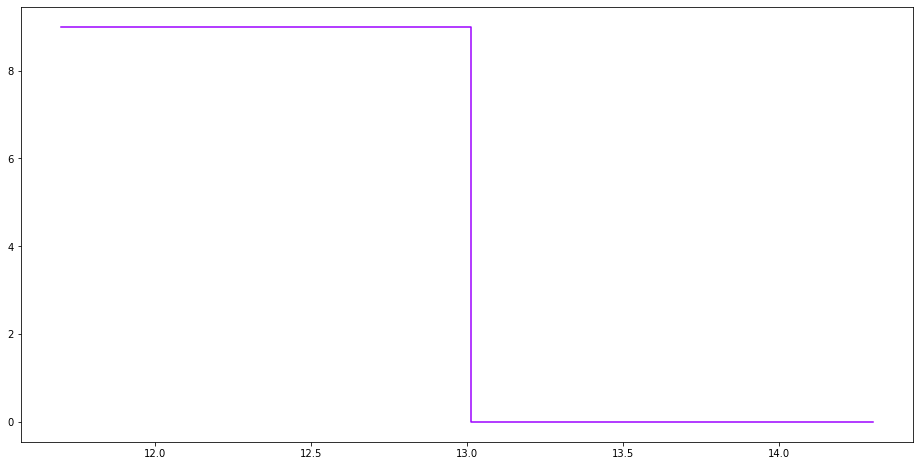

In [8]:
s3 = Step(end=13,weight=3)
#s3.step([get_epoch_start(False),13])
#s3.plot(method='function')
(s3*s3).plot()

[<AxesSubplot:>,
 <AxesSubplot:title={'center':'Step Values Empirical Distribution'}, xlabel='Steps Range'>,
 <AxesSubplot:>,
 <AxesSubplot:title={'center':'Step Values Histogram'}, xlabel='Steps Range'>,

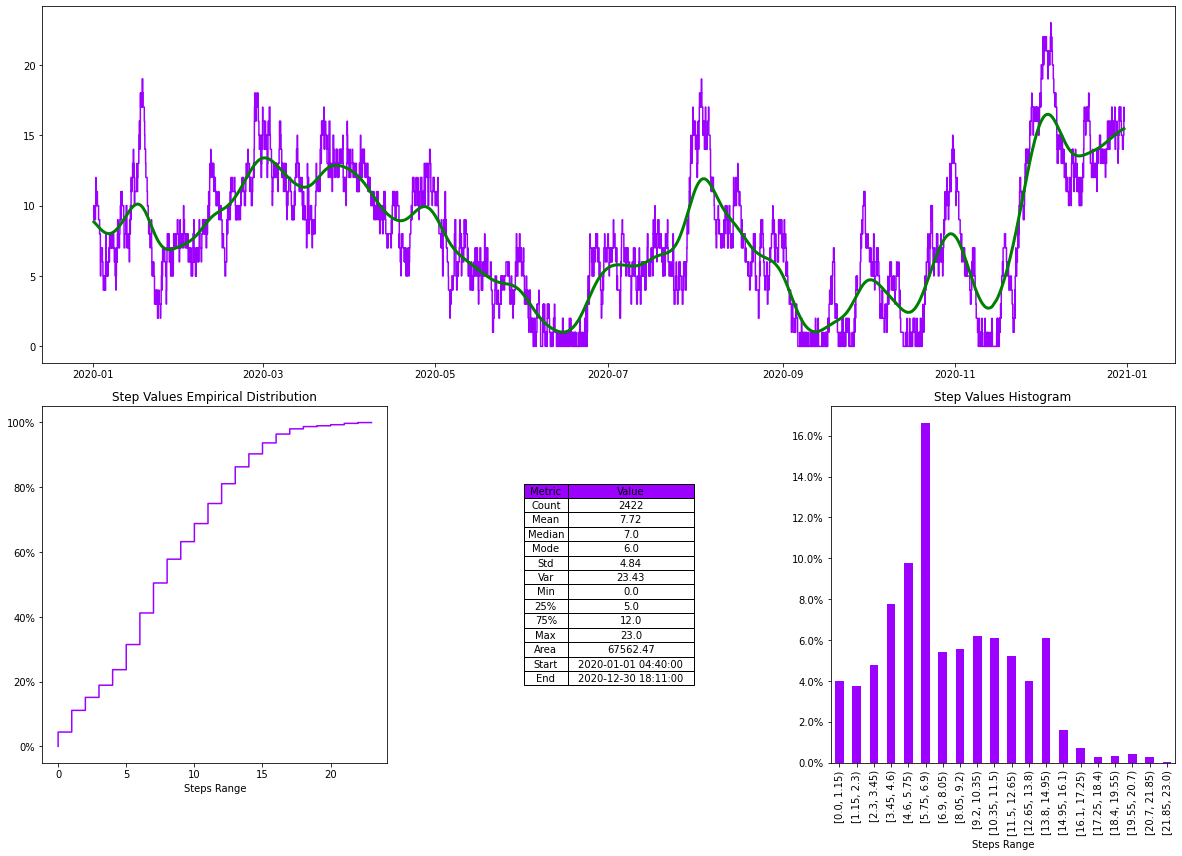

In [9]:
vsteps.summary()

<AxesSubplot:>

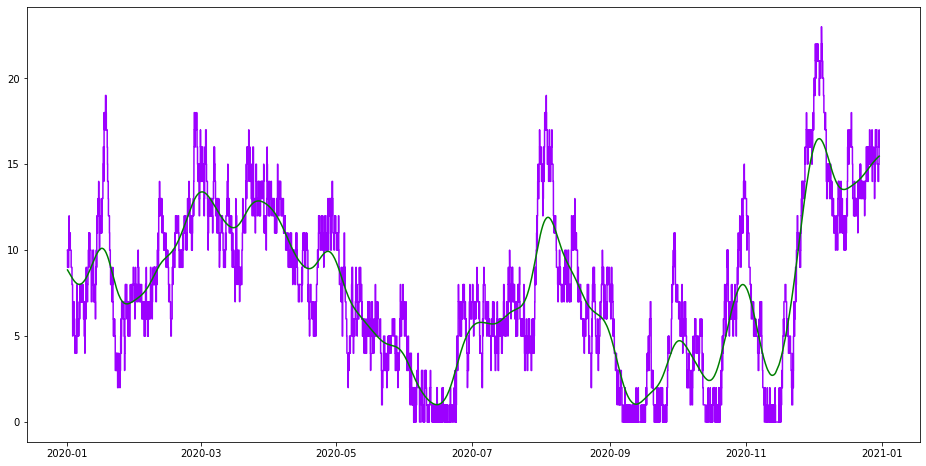

In [10]:
ax = vsteps.plot()
vsteps.smooth_plot(ax=ax,color='g')

In [12]:
from hotstepper.utilities.helpers import get_epoch_start
vsteps_smooth = vsteps.copy()
vsteps_smooth.rebase(Basis(Bases.logit,10**4))

vsteps_smooth.step([get_epoch_start(True)])


array([10.])